## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
df_train = pd.read_csv("train_data_enriched_multivar.csv")
df_test = pd.read_csv("test_data_enriched_multivar.csv")

C:\Users\joao5\AppData\Local\Temp\ipykernel_4756\3134510140.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("train_data_enriched_multivar.csv")
C:\Users\joao5\AppData\Local\Temp\ipykernel_4756\3134510140.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv("test_data_enriched_multivar.csv")


## Looking At The Enriched Data

In [3]:
df_train.columns

Index(['Unnamed: 0', 'Accident Date', 'Age at Injury',
       'Alternative Dispute Resolution', 'Assembly Date',
       'Attorney/Representative', 'Average Weekly Wage', 'Birth Year',
       'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code', 'Number of Dependents',
       'Accident Year', 'Accident Month', 'Accident Day', 'Accident DayOfWeek',
       'Assembly Date DSA', 'C-2 Date DSA', 'C-3 Date DSA',
       'First Hearing Date DSA', 'Accident Date_missing',
       'First Hearing Date_missing', 'C-3 Date_missing',
       

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574026 entries, 0 to 574025
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         574026 non-null  int64  
 1   Accident Date                      570337 non-null  object 
 2   Age at Injury                      568562 non-null  float64
 3   Alternative Dispute Resolution     574021 non-null  float64
 4   Assembly Date                      406835 non-null  object 
 5   Attorney/Representative            574026 non-null  float64
 6   Average Weekly Wage                209925 non-null  float64
 7   Birth Year                         519867 non-null  float64
 8   C-2 Date                           558484 non-null  object 
 9   C-3 Date                           111334 non-null  object 
 10  Carrier Name                       574026 non-null  object 
 11  Carrier Type                       5740

## Visualizing The New Variables

### New Numeric Variables

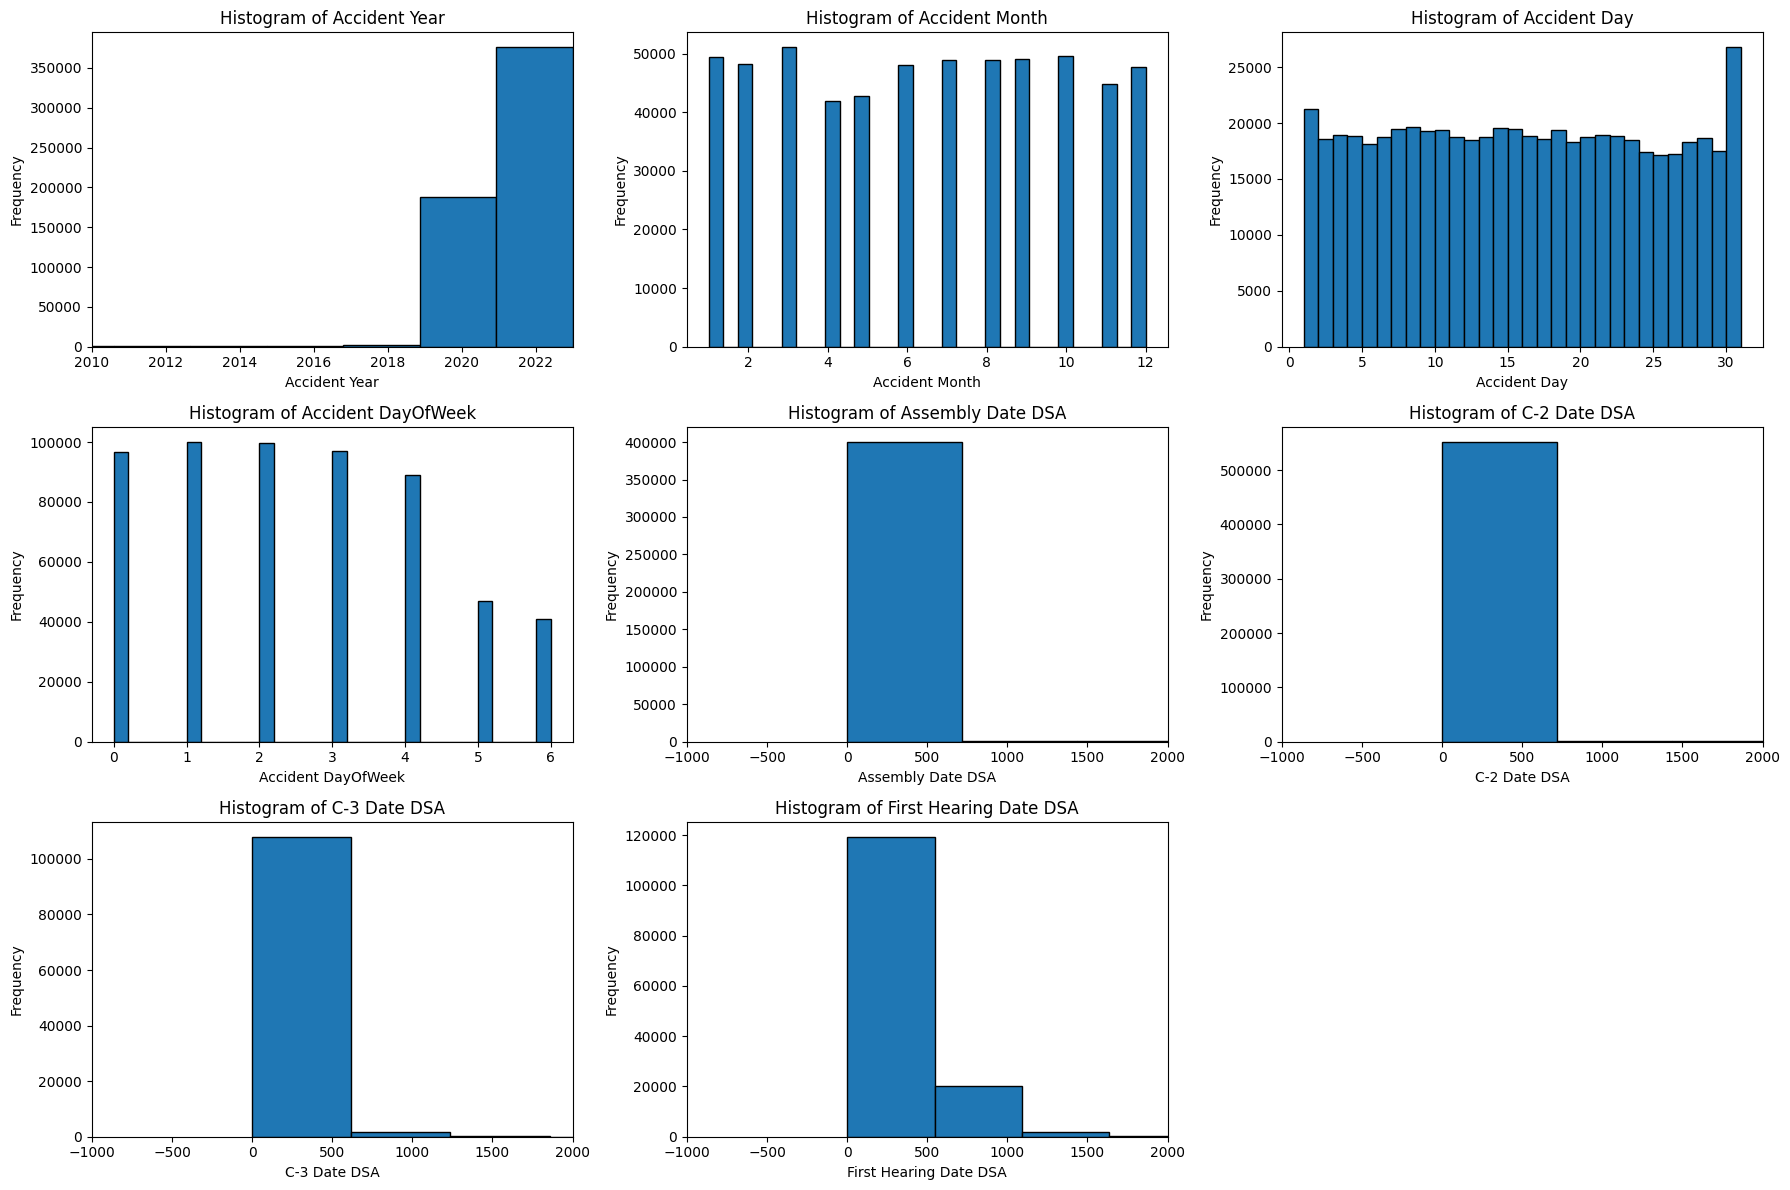

In [5]:
# List of numeric variables for histogram visualization
numeric_columns = [
    'Accident Year', 'Accident Month', 'Accident Day', 'Accident DayOfWeek',
    'Assembly Date DSA', 'C-2 Date DSA', 'C-3 Date DSA', 'First Hearing Date DSA'
]

# Define the layout for subplots: 3 columns per row
num_cols = len(numeric_columns)
num_rows = (num_cols // 3) + 1  # Three columns per row

# Create the subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows * 4))

# Flatten the axes array to access each subplot individually
axes = axes.flatten()

# Generate a histogram for each variable in the list
for i, col in enumerate(numeric_columns):
    # Create the data for the histogram, removing NaN values
    data = df_train[col].dropna()  # Drop NaN values
    
    # Create the histogram for the variable
    axes[i].hist(data, bins=30, edgecolor='black')  # Histogram settings
    axes[i].set_title(f'Histogram of {col}')  # Title for each subplot
    axes[i].set_xlabel(col)  # X-axis label
    axes[i].set_ylabel('Frequency')  # Y-axis label

    # Set specific axis limits based on column
    if col == 'Accident Year':
        axes[i].set_xlim([2010, df_train['Accident Year'].max()])
    elif col == 'Assembly Date DSA' or col == 'C-2 Date DSA' or col == 'C-3 Date DSA' or col == 'First Hearing Date DSA':
        axes[i].set_xlim([-1000, 2000])  # Default max range

# Turn off axes for any unused subplots to keep layout clean
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


- Most accident records are from approximately 2019 to 2022.
- March had the highest number of accident records, followed by January and October. April saw the fewest accidents, followed by May and November.
- The last day of the month had the highest accident occurrence, with the first day following closely behind.
- Tuesday is the weekday with the most accidents, with a decreasing trend toward the weekend. Saturday and Sunday have the lowest recorded accidents, highlighting a clear dip in accidents on weekends.

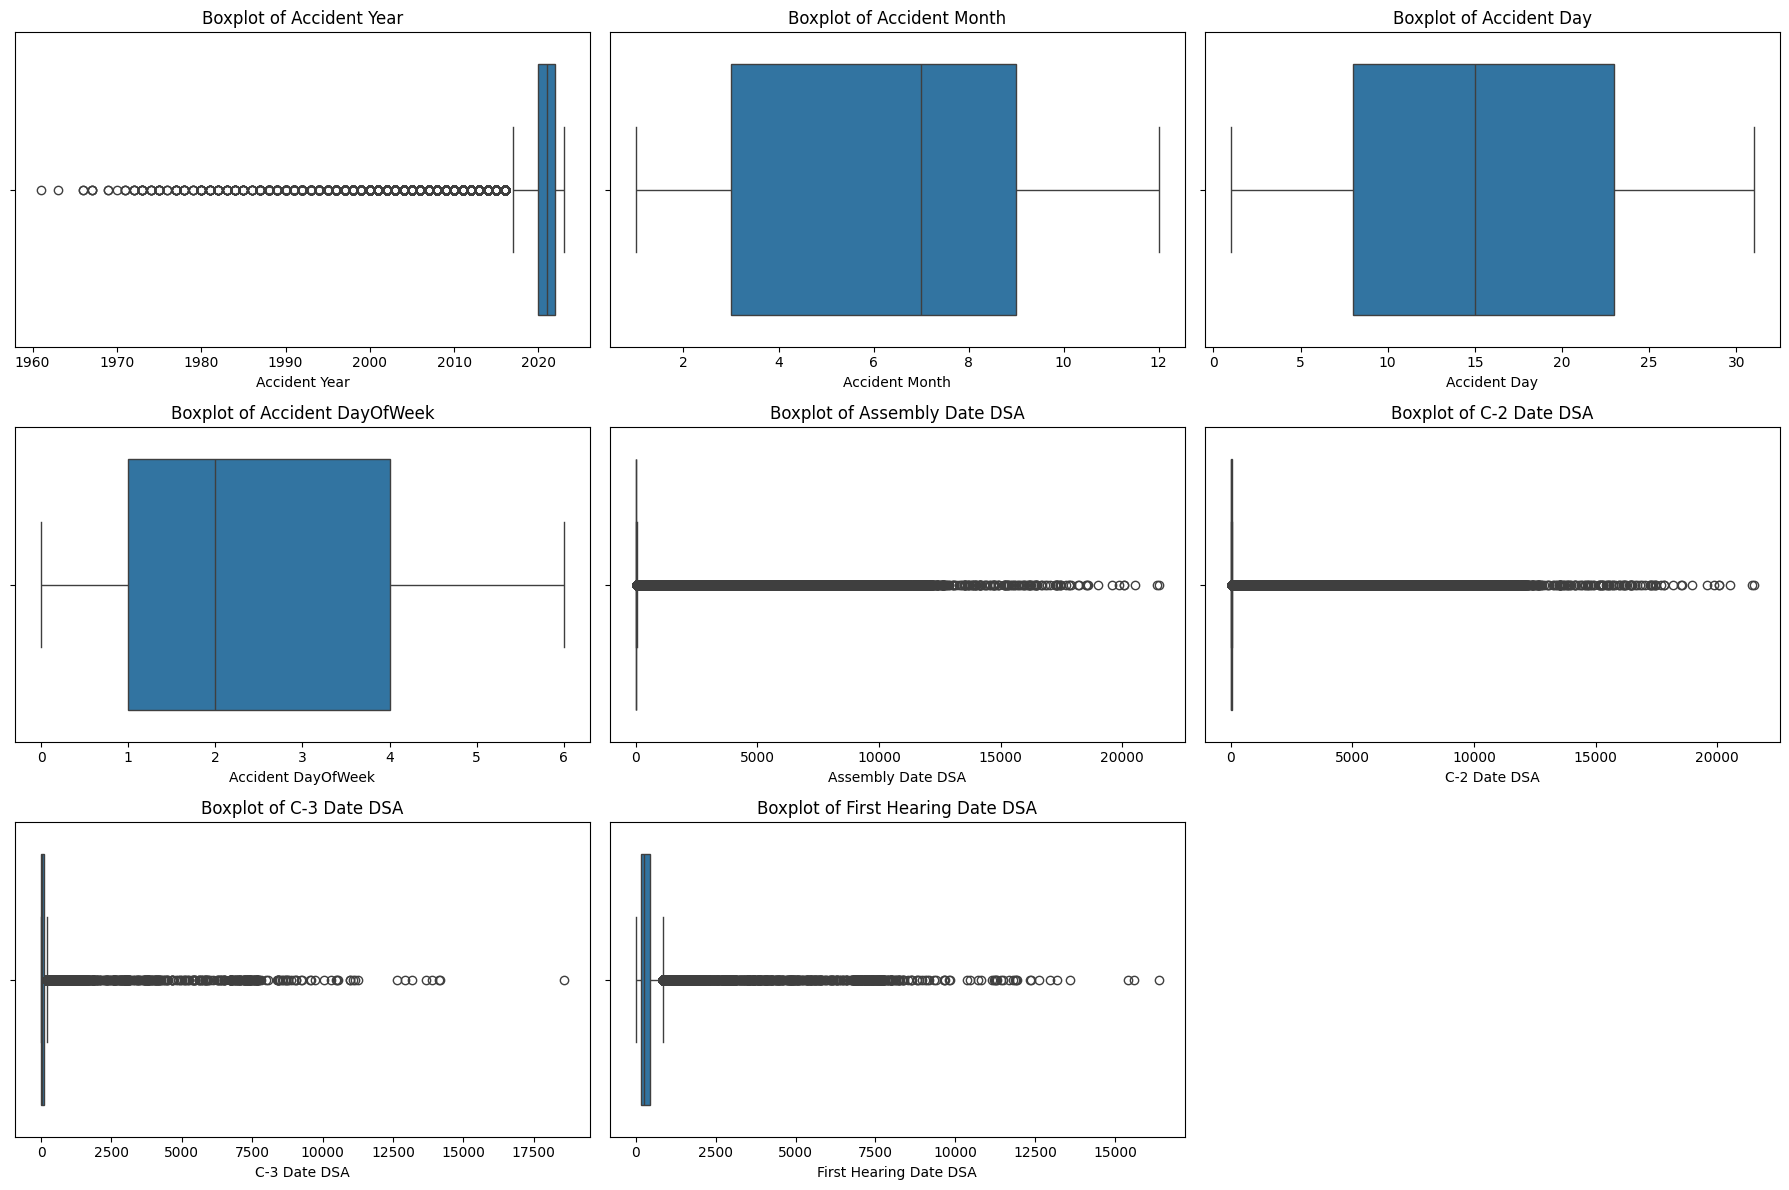

In [6]:
# Set up subplots in a grid layout
num_cols = len(numeric_columns)
num_rows = (num_cols // 3) + 1  # Using 3 columns per row for layout

# Create the subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows * 4))

# Flatten axes array for easier access to each subplot
axes = axes.flatten()

# Plot a boxplot for each numeric variable
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df_train, x=col, ax=axes[i])  # Create boxplot
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

# Turn off axes for unused subplots to keep the layout clean
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### New Categorical Variables

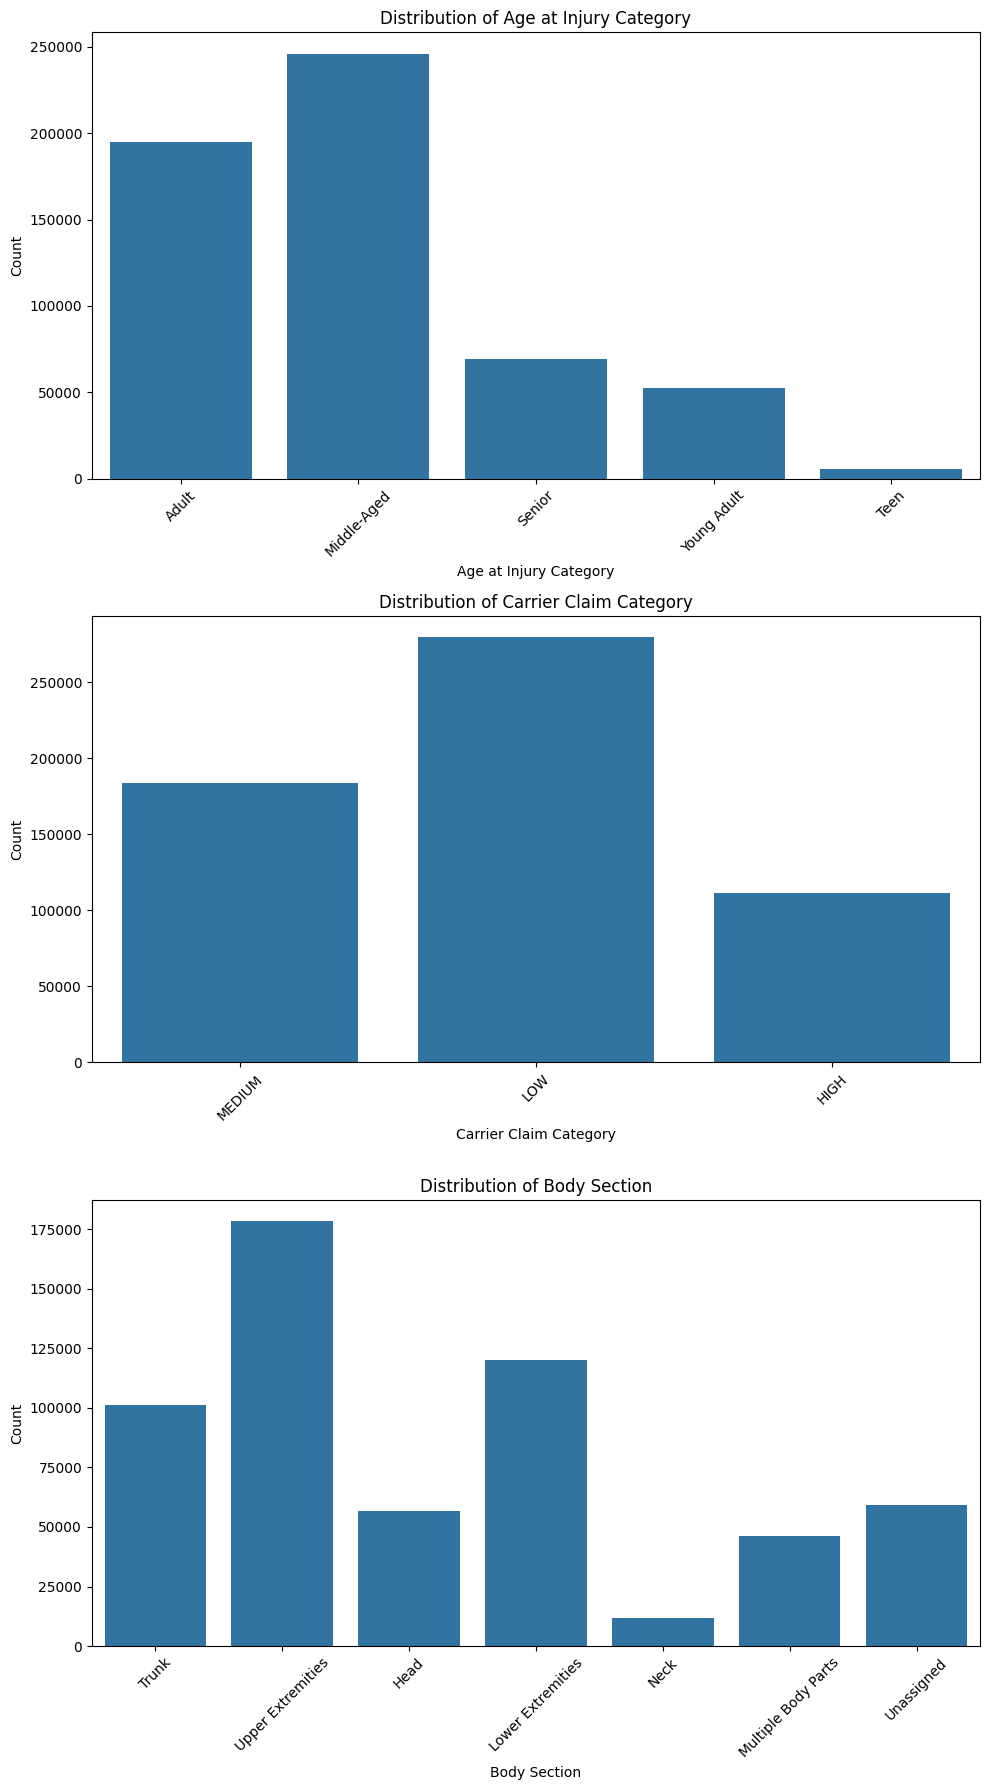

In [7]:
# List of categorical variables for bar plot visualization
categorical_columns = [
    'Age at Injury Category', 'Carrier Claim Category', 'Body Section'
]

# Define the layout for subplots: 1 column per row for better clarity
num_cols = len(categorical_columns)
num_rows = num_cols  # One row per variable

# Create the subplots
fig, axes = plt.subplots(num_rows, 1, figsize=(10, num_rows * 6))

if num_rows == 1:
    axes = [axes]  # Make axes a list if there's only one subplot

# Generate a bar plot for each variable in the list
for i, col in enumerate(categorical_columns):
    # Plot the bar plot
    sns.countplot(data=df_train, x=col, ax=axes[i])  
    axes[i].set_title(f'Distribution of {col}')  # Title for each subplot
    axes[i].set_xlabel(col)  # X-axis label
    axes[i].set_ylabel('Count')  # Y-axis label
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

- The highest number of accident records is found in middle-aged individuals, followed by adults. The lowest frequency of accident records is observed in teenagers.
- Accidents involving the 'upper extremities' are the most frequent, followed by 'lower extremities' and 'trunk.' The least number of accidents are recorded in the 'neck' area. The higher frequency of accidents involving the upper and lower extremities (arms, hands, legs, feet) might be due to their frequent exposure to risk in various work environments. The trunk (torso) is likely involved in a variety of accidents, but not as frequently as limbs, which are more exposed to physical strain or injuries. The neck, being a more sensitive area, might be less frequently injured, possibly due to fewer high-risk activities directly affecting it or due to higher awareness of neck safety.

## Exploring Numeric Features Correlation

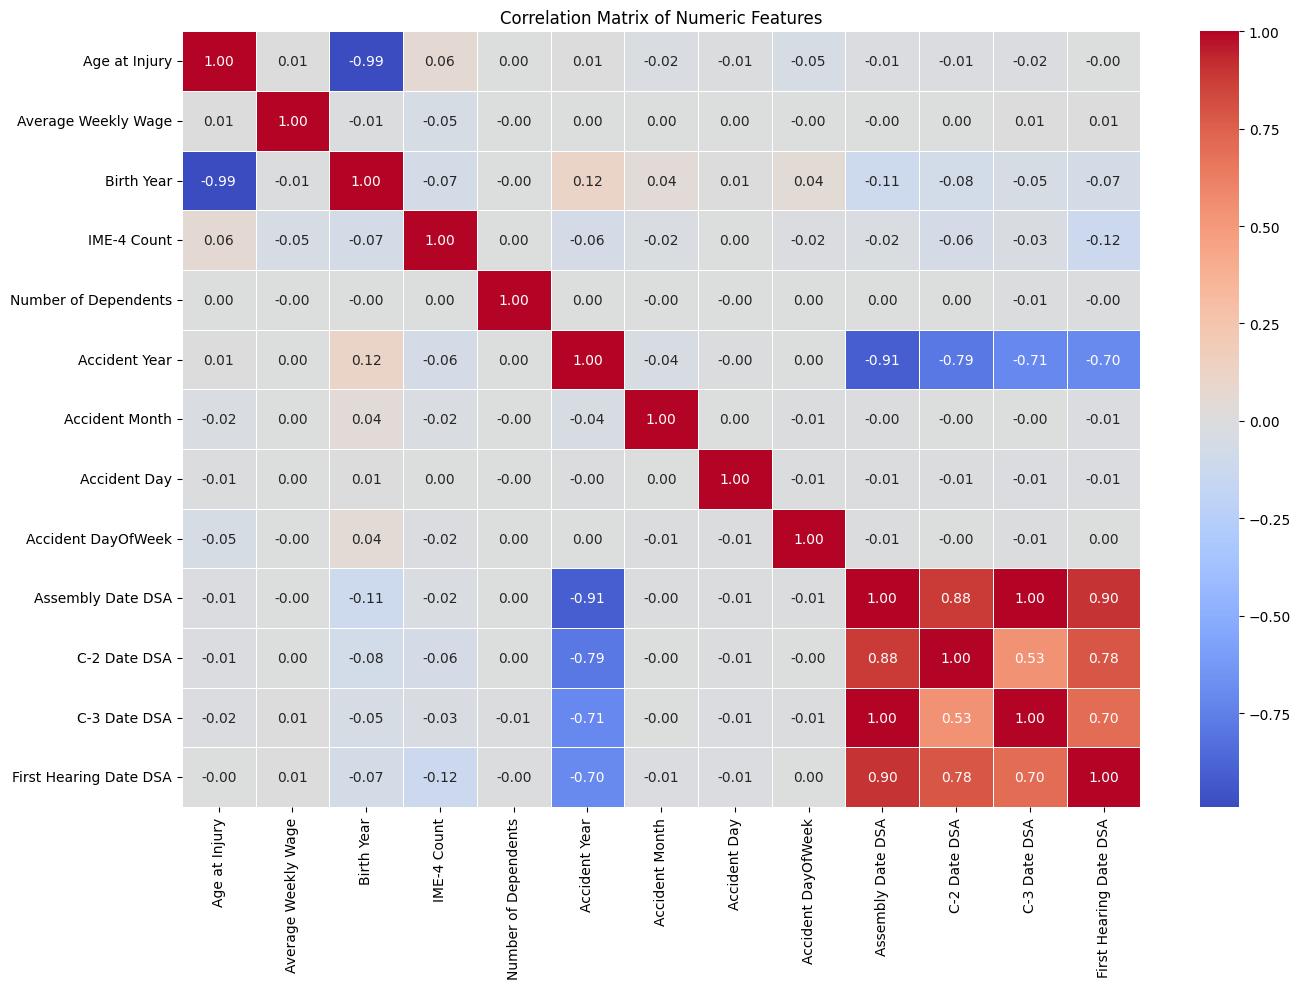

In [8]:
numeric_columns = [
    'Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count',
    'Number of Dependents', 'Accident Year', 'Accident Month', 'Accident Day',
    'Accident DayOfWeek', 'Assembly Date DSA', 'C-2 Date DSA', 'C-3 Date DSA',
    'First Hearing Date DSA'
]

# Calculate the correlation matrix
correlation_matrix = df_train[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

### High Positive Correlations Between Date Variables:
- Assembly Date DSA, C2 Date DSA, C3 Date DSA, and First Hearing Date DSA show very high positive correlations, ranging from 0.53 to 1.00. This aligns with the fact that these date variables are closely related and represent different stages in the claims process, such as when the case was first assembled, when the relevant forms were received (C2, C3), and when the first hearing took place.
- Conclusion: These date variables likely follow a similar timeline, meaning that if one event occurs, the others are also likely to happen around the same time. The correlation suggests that the claims process follows a clear and predictable order, where events tend to happen sequentially.
### Negative Correlation Between Accident Year and Date Variables:
- Accident Year shows a strong negative correlation with Assembly Date DSA, C2 Date DSA, C3 Date DSA, and First Hearing Date DSA, with values ranging from -0.70 to -0.91. This indicates that as the accident year increases, the associated dates (assembly, C2, C3, and first hearing) tend to occur earlier in the timeline.
- Conclusion: This could suggest that more recent claims (with higher accident years) may be processed more quickly, or it could indicate that older claims are still in the system, leading to delays in their finalization. It may also imply that claims related to more recent accidents are processed faster than those from earlier years, possibly due to improvements in the claims handling system or changes in workflow over time.
### Strong Negative Correlation Between Age at Injury and Birth Year:
- Age at Injury and Birth Year exhibit a very strong negative correlation of -0.99, as expected, because these two variables should essentially subtract to the same value (the year of injury minus the birth year).
- Conclusion: This negative correlation is logical since age at injury is directly tied to the birth year. A person’s age at the time of injury is simply the difference between the injury year and the birth year, resulting in a near-perfect inverse relationship.
### Positive Correlation Between Accident Year and Claim Identifier:
- Accident Year has a moderate positive correlation of 0.43 with Claim Identifier.
- Conclusion: This suggests that the accident year is somewhat related to the claim identifier, implying that claims from specific years may be grouped or numbered in a way that reflects the year of the accident. While this correlation is not particularly strong, it indicates a potential pattern that could be useful for tracking claims by year or identifying trends in claim processing.


### Exploring the Relationship Between Body Section and Age at Injury Category

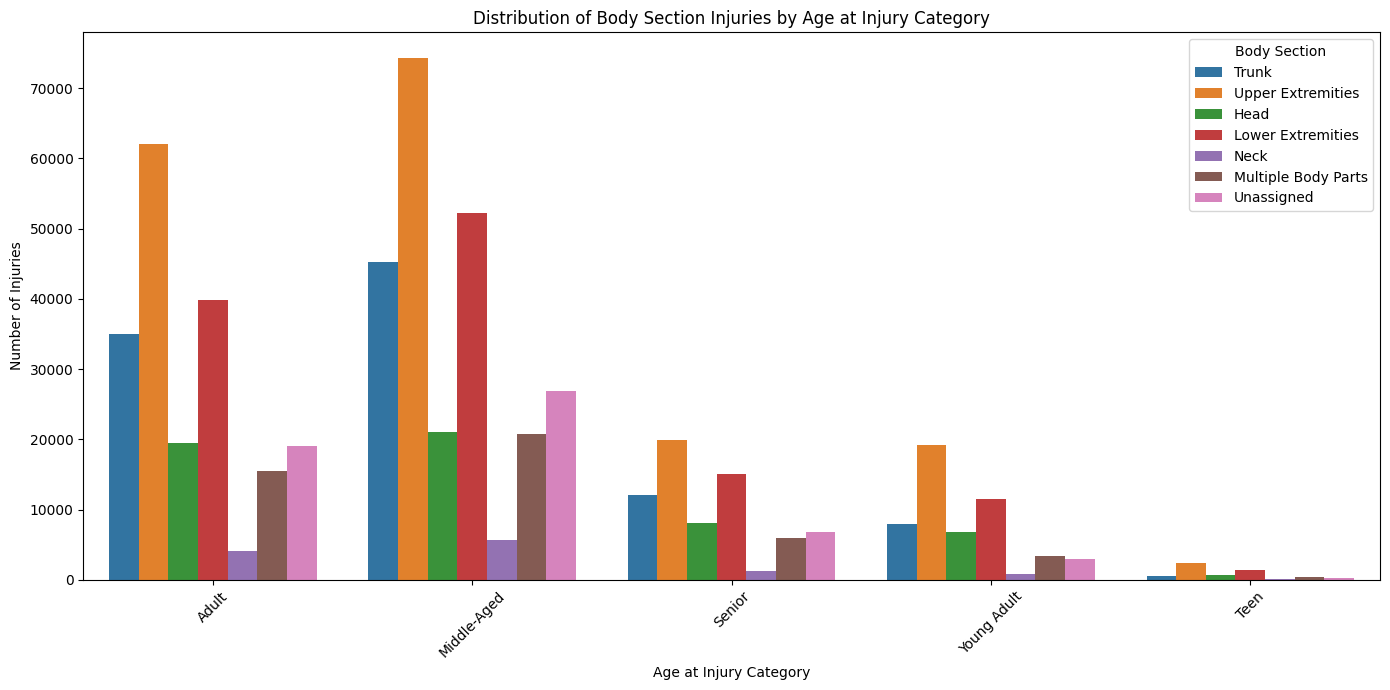

In [9]:
# Create a countplot to visualize the relationship between Body Section and Age at Injury Category
plt.figure(figsize=(14, 7))
sns.countplot(data=df_train, x='Age at Injury Category', hue='Body Section')

# Adding labels and title
plt.title('Distribution of Body Section Injuries by Age at Injury Category')
plt.xlabel('Age at Injury Category')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)

# Adjust layout for better readability
plt.tight_layout()
plt.show()

There are no significant patterns found between the worker's age group and the type of body section affected by injuries. Regardless of age, the following trends were observed:

- Upper extremities (arms, hands, shoulders) are consistently the most common area injured.
- Lower extremities (legs, knees, feet) follow as the second most frequent injuries.
- Neck injuries are the least common in all age groups.
  
This indicates that the body section affected does not show strong dependency on the worker's age.

### Exploring the Relationship Between District Name and Carrier Name

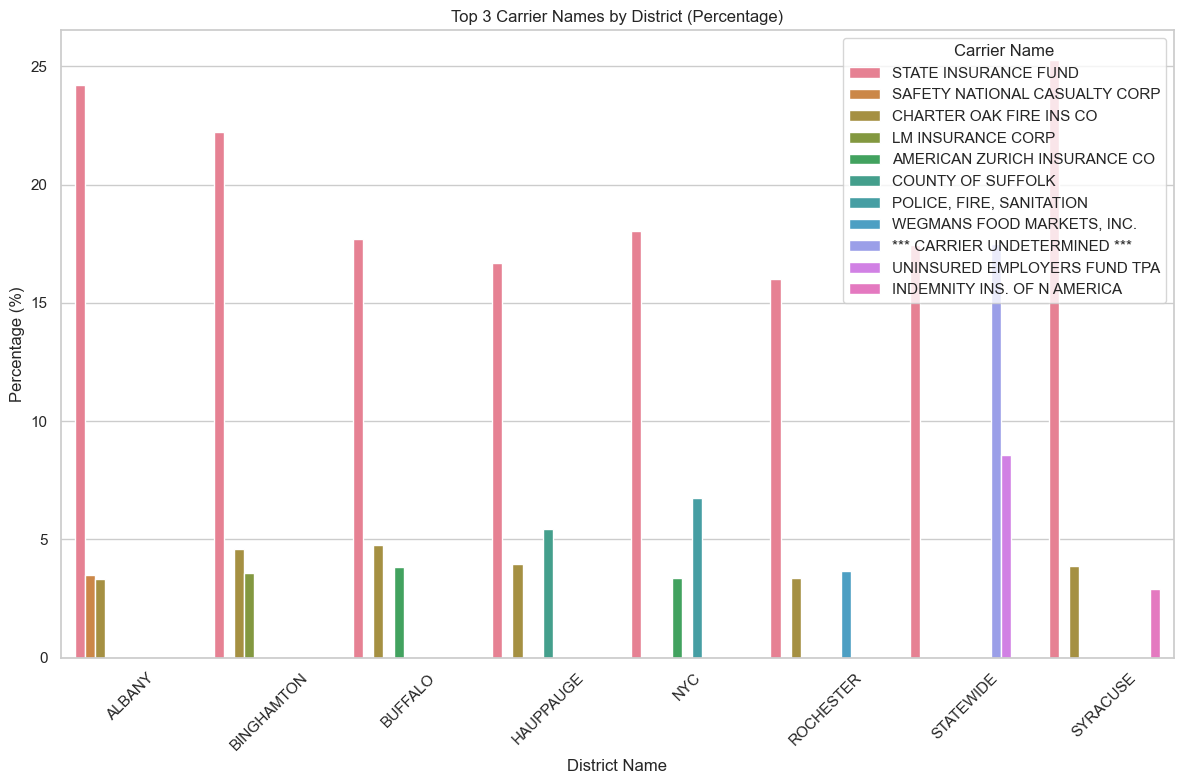

In [10]:
# Step 1: Calculate counts for each district and carrier name
top_carriers = (
    df_train
    .groupby(['District Name', 'Carrier Name'])
    .size()
    .reset_index(name='Count')
)
# Step 2: Calculate the total count per district
top_carriers['Total Count'] = top_carriers.groupby('District Name')['Count'].transform('sum')
# Step 3: Calculate the percentage of each carrier name within each district
top_carriers['Percentage'] = (top_carriers['Count'] / top_carriers['Total Count']) * 100
# Step 4: Sort and select the top 3 carrier names for each district
top_3_carriers_per_district = (
    top_carriers
    .sort_values(['District Name', 'Percentage'], ascending=[True, False])
    .groupby('District Name')
    .head(3)
)
# Step 5: Plot the percentages as a bar plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
# Bar plot with 'District Name' on x-axis, 'Percentage' on y-axis, and hue as 'Carrier Name'
sns.barplot(
    data=top_3_carriers_per_district,
    x='District Name',
    y='Percentage',
    hue='Carrier Name',
    dodge=True
)
plt.xlabel('District Name')
plt.ylabel('Percentage (%)')
plt.title('Top 3 Carrier Names by District (Percentage)')
# Rotate x-axis labels for readability if needed
plt.xticks(rotation=45)
# Display the legend and the plot
plt.legend(title='Carrier Name')
plt.tight_layout()
plt.show()

The chart reveals that "STATE INSURANCE FUND" dominates the insurance market across all districts. Other carriers, like "SAFETY NATIONAL CASUALTY CORP" and "UNINSURED EMPLOYERS FUND TPA," appear in specific regions but with significantly lower percentages, indicating a concentrated market. Some carriers, such as "POLICE, FIRE, SANITATION" in NYC and "WEGMANS FOOD MARKETS, INC." in Rochester, are district-specific, suggesting a focus on localized industries or unique roles.

### Exploring the Relationship Between District Name and Industry Code Description

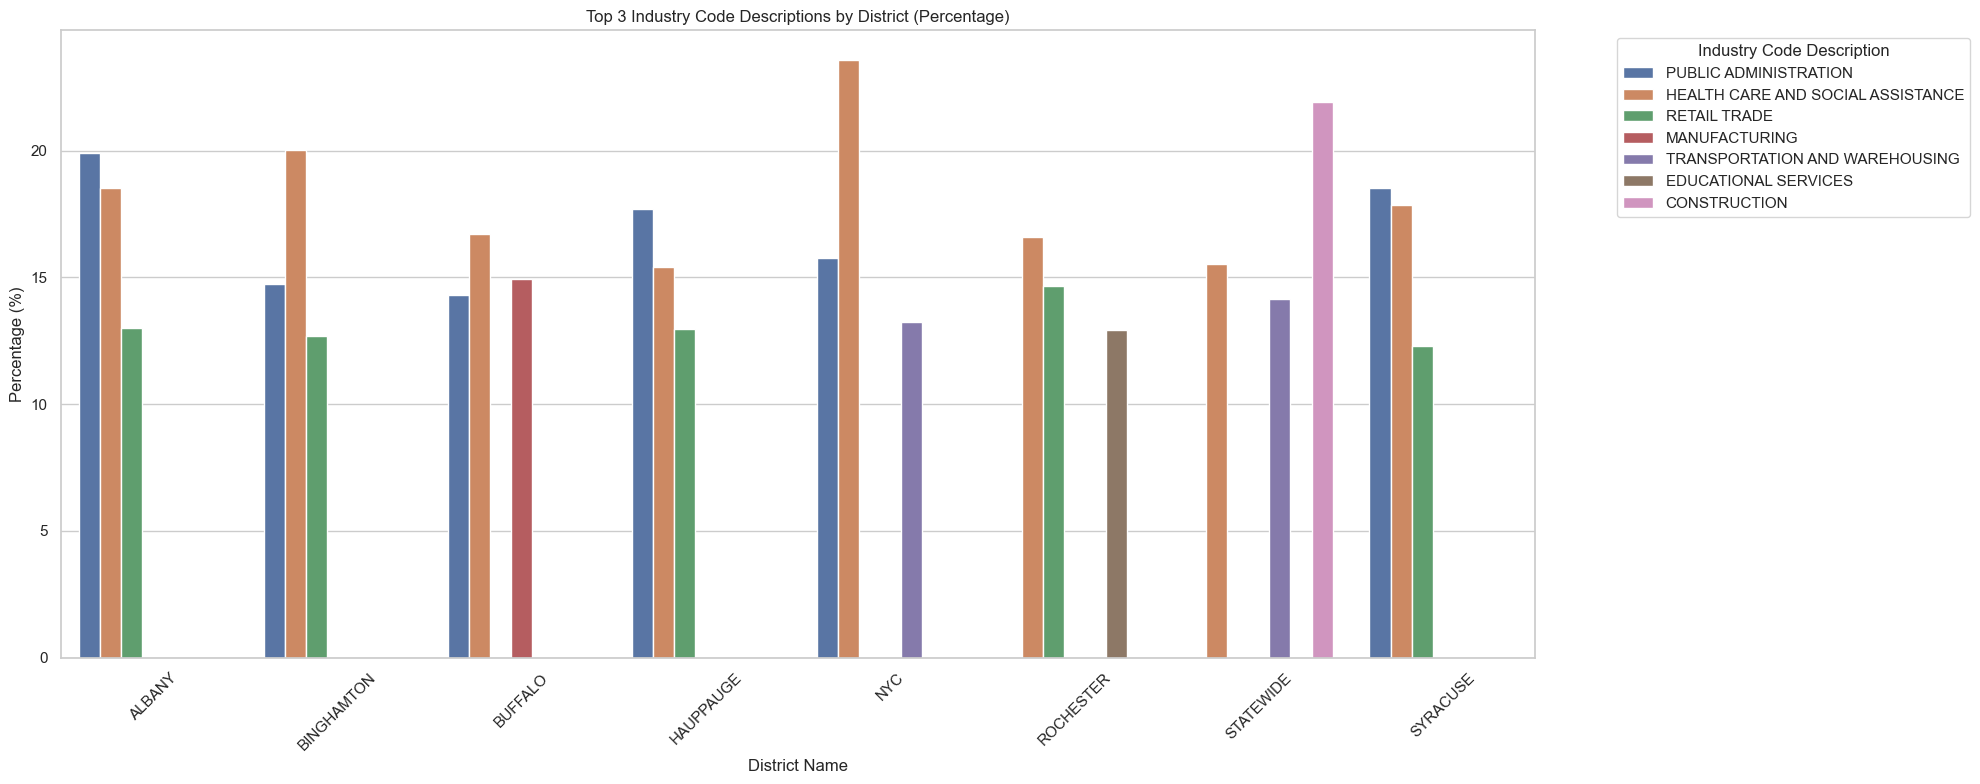

In [11]:
top_industries = (
    df_train
    .groupby(['District Name', 'Industry Code Description'],observed=False)
    .size()
    .reset_index(name='Count')
)

top_industries['Total Count'] = top_industries.groupby('District Name',observed=False)['Count'].transform('sum')

top_industries['Percentage'] = (top_industries['Count'] / top_industries['Total Count']) * 100

# Step 4: Sort and select the top 3 industry code descriptions for each district
top_3_industries_per_district = (
    top_industries
    .sort_values(['District Name', 'Percentage'], ascending=[True, False])
    .groupby('District Name',observed=False)
    .head(3)
)

# Step 5: Plot the percentages as a bar plot
plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")

# Bar plot with 'District Name' on x-axis, 'Percentage' on y-axis, and hue as 'Industry Code Description'
sns.barplot(
    data=top_3_industries_per_district,
    x='District Name',
    y='Percentage',
    hue='Industry Code Description',
    dodge=True
)

# Set plot labels and title
plt.xlabel('District Name')
plt.ylabel('Percentage (%)')
plt.title('Top 3 Industry Code Descriptions by District (Percentage)')

# Rotate x-axis labels for readability if needed
plt.xticks(rotation=45)

# Display the legend and the plot
plt.legend(title='Industry Code Description',fancybox=True,alignment='center', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


By this plot we can take that "HEALTH CARE AND SOCIAL ASSISTANCE" is a leading industry in most districts. "PUBLIC ADMINISTRATION" and "RETAIL TRADE" also have strong representation across multiple areas, with public administration prominent in Albany, Binghamton, and Statewide. "CONSTRUCTION" stands out in Statewide. Additionally, "TRANSPORTATION AND WAREHOUSING" is notable in Rochester, while "EDUCATIONAL SERVICES" has a strong presence Statewide. Overall, healthcare, public administration, and retail are key sectors, with some districts showing unique industry strengths.

### Exploring the Relationship Between District Name and Average Weekly Wage

C:\Users\joao5\AppData\Local\Temp\ipykernel_4756\3526924353.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


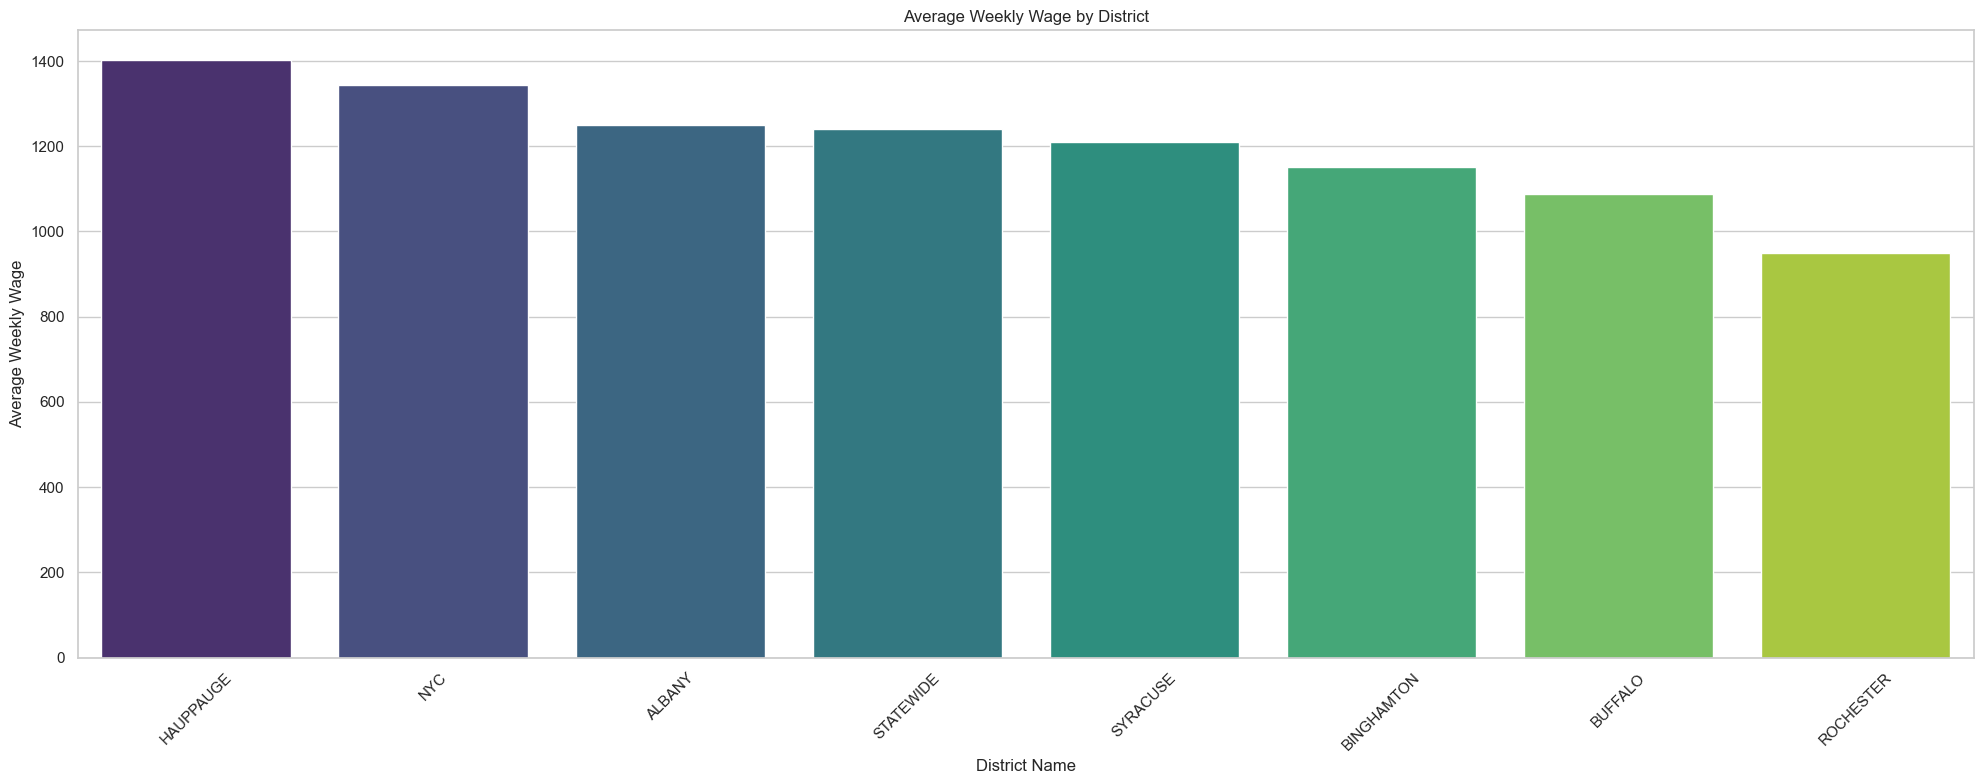

In [12]:
avg_weekly_wage_per_district = (
    df_train
    .groupby('District Name', observed=False)['Average Weekly Wage']  # Assuming the column name is 'Average Weekly Wage'
    .mean()
    .reset_index(name='Average Weekly Wage')
)

# Step 2: Sort by average weekly wage in descending order
avg_weekly_wage_per_district = avg_weekly_wage_per_district.sort_values(by='Average Weekly Wage', ascending=False)

# Step 3: Plot the average weekly wage for each district as a bar plot
plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")

# Bar plot with 'District Name' on x-axis, 'Average Weekly Wage' on y-axis
sns.barplot(
    data=avg_weekly_wage_per_district,
    x='District Name',
    y='Average Weekly Wage',
    palette='viridis'  # Optional: Change the color palette
)

# Set plot labels and title
plt.xlabel('District Name')
plt.ylabel('Average Weekly Wage')
plt.title('Average Weekly Wage by District')

# Rotate x-axis labels for readability if needed
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

With this chart, we can conclude that thes districts with better average weekly wage is Hauppage and NYC and the ones with worst is Rochester and Buffalo.

### Exploring the Relationship Between Gender and Average Weekly Wage

C:\Users\joao5\AppData\Local\Temp\ipykernel_4756\2511393091.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


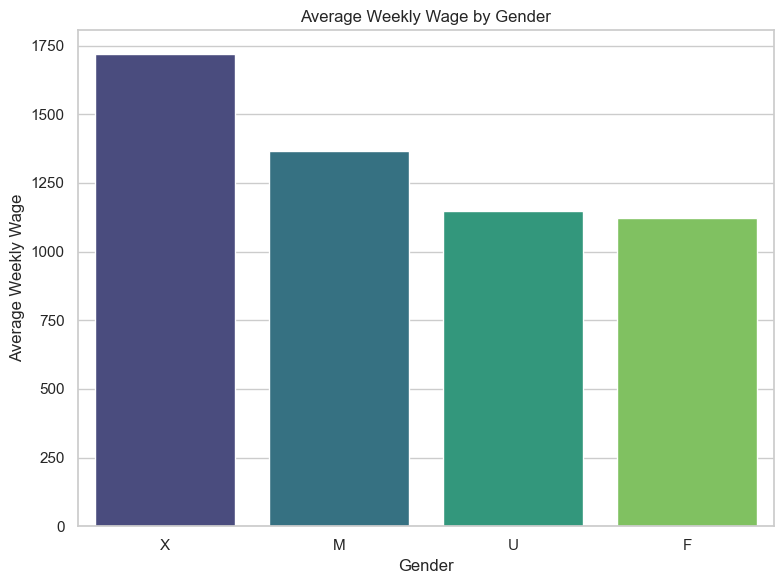

In [13]:
# Step 1: Calculate the average weekly wage for each gender
avg_weekly_wage_per_gender = (
    df_train
    .groupby('Gender', observed=False)['Average Weekly Wage']  # Grouping by 'Gender' instead of 'District Name'
    .mean()
    .reset_index(name='Average Weekly Wage')
)

# Step 2: Sort by average weekly wage in descending order
avg_weekly_wage_per_gender = avg_weekly_wage_per_gender.sort_values(by='Average Weekly Wage', ascending=False)

# Step 3: Plot the average weekly wage for each gender as a bar plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Bar plot with 'Gender' on x-axis, 'Average Weekly Wage' on y-axis
sns.barplot(
    data=avg_weekly_wage_per_gender,
    x='Gender',
    y='Average Weekly Wage',
    palette='viridis'  # Optional: Change the color palette
)

# Set plot labels and title
plt.xlabel('Gender')
plt.ylabel('Average Weekly Wage')
plt.title('Average Weekly Wage by Gender')

# Rotate x-axis labels for readability if needed
plt.xticks(rotation=0)  # You can adjust the rotation if necessary

# Display the plot
plt.tight_layout()
plt.show()


This graph clearly shows a wage gap between female and male workers, which may point to systemic factors driving pay inequality and could encourage companies to take action on this issue.

### Exploring the Relationship Between Age Group and Claim Injury Type

C:\Users\joao5\AppData\Local\Temp\ipykernel_4756\2954611342.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_train, x='Claim Injury Type', y='Age at Injury', inner='quart', palette='Set2')


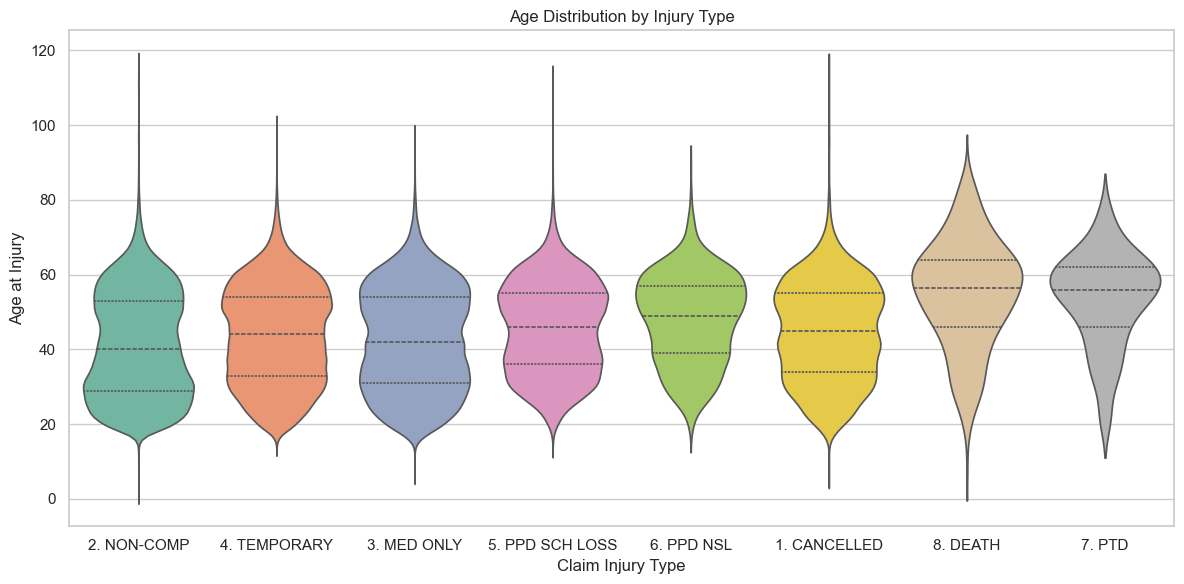

In [14]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_train, x='Claim Injury Type', y='Age at Injury', inner='quart', palette='Set2')
plt.title('Age Distribution by Injury Type')
plt.xlabel('Claim Injury Type')
plt.ylabel('Age at Injury')
plt.tight_layout()
plt.show()

- These claims are predominantly seen in older age groups, with death claims highest among those aged 60+ and PTD claims most frequent among those aged 51-60. This trend suggests that advancing age and cumulative health conditions contribute to the likelihood of severe outcomes like death or permanent disability.
- Younger workers (ages 18-30, followed by 31-40) are more likely to file non-comp claims. This indicates that younger individuals experience more minor injuries (e.g., soft tissue injuries) that don’t lead to long-term disabilities and are therefore non-compensable.
- These claims are spread more evenly across age groups, showing no significant relationship with age. This suggests that these types of injuries may be more influenced by factors like job type or accident specifics, rather than age itself.
- Age is a clear factor for more severe claims like death and PTD, with older workers more likely to suffer from such outcomes due to age-related health declines.
- Younger Workers and Non-Severe Injuries: Younger workers show a higher tendency for non-comp claims, typically involving less severe injuries.
- Injury Types Not Age-Dependent: Med-Only, Temporary, and PPD Sch Loss claims lack a strong correlation with age, likely reflecting a broader range of influencing factors beyond age alone.

Overall, age is a significant factor for severe injuries (Death and PTD), while younger workers are more prone to non-compensable, less severe injuries. Other injury types appear largely independent of age, implying that factors like job characteristics may play a larger role.

### Exploring the Relationship Between Injury Types and Medical Fee Region

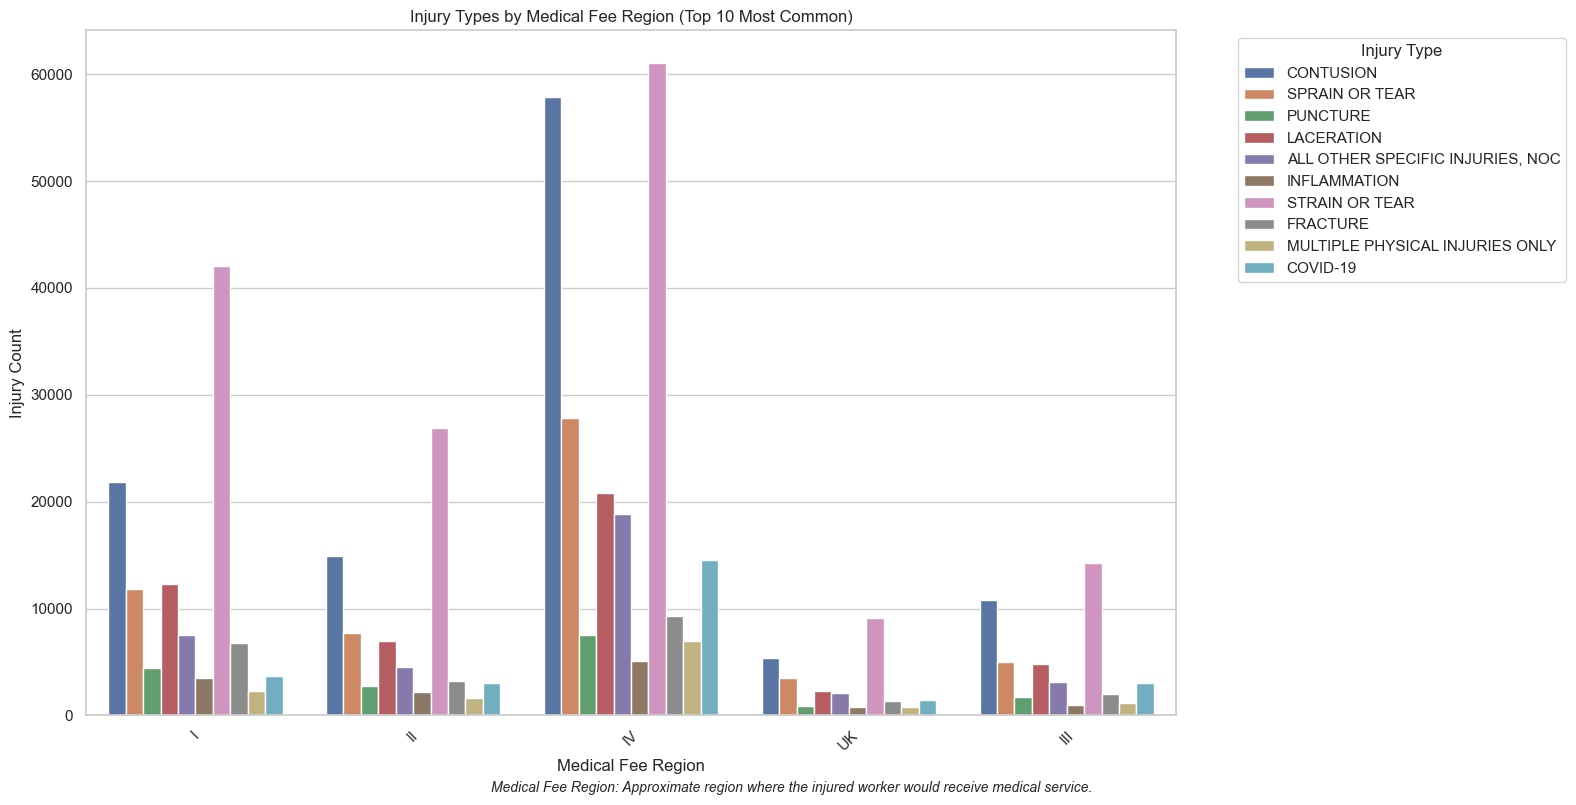

In [15]:
# Select the top 10 most common injury types
top_10_injury_types = df_train['WCIO Nature of Injury Description'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 most common injury types
df_filtered = df_train[df_train['WCIO Nature of Injury Description'].isin(top_10_injury_types)]

# Set the figure size
plt.figure(figsize=(16, 8))

# Create the grouped bar plot
sns.countplot(data=df_filtered, x='Medical Fee Region', hue='WCIO Nature of Injury Description')
plt.xlabel('Medical Fee Region')
plt.ylabel('Injury Count')
plt.title('Injury Types by Medical Fee Region (Top 10 Most Common)')
plt.legend(title='Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a description for the Medical Fee Region
plt.figtext(0.5, 0.0, "Medical Fee Region: Approximate region where the injured worker would receive medical service.", ha="center", fontsize=10, style="italic")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Region IV has the most claims, followed by Region I, while Regions II and III have fewer claims. The higher number of claims in Region IV may be due to a larger population or more workplace incidents, but there's no clear link between injury types and regions.
- Strains and tears are the most common injuries, followed by contusions and lacerations, regardless of the region. This suggests that musculoskeletal injuries are frequent across all regions.
- While Region IV has the most claims for various injury types (including COVID-19), and Region II and III have fewer claims, the distribution of injury types (strains, contusions) remains similar across all regions. There doesn't seem to be a direct relationship between the medical fee region and the type of injury.

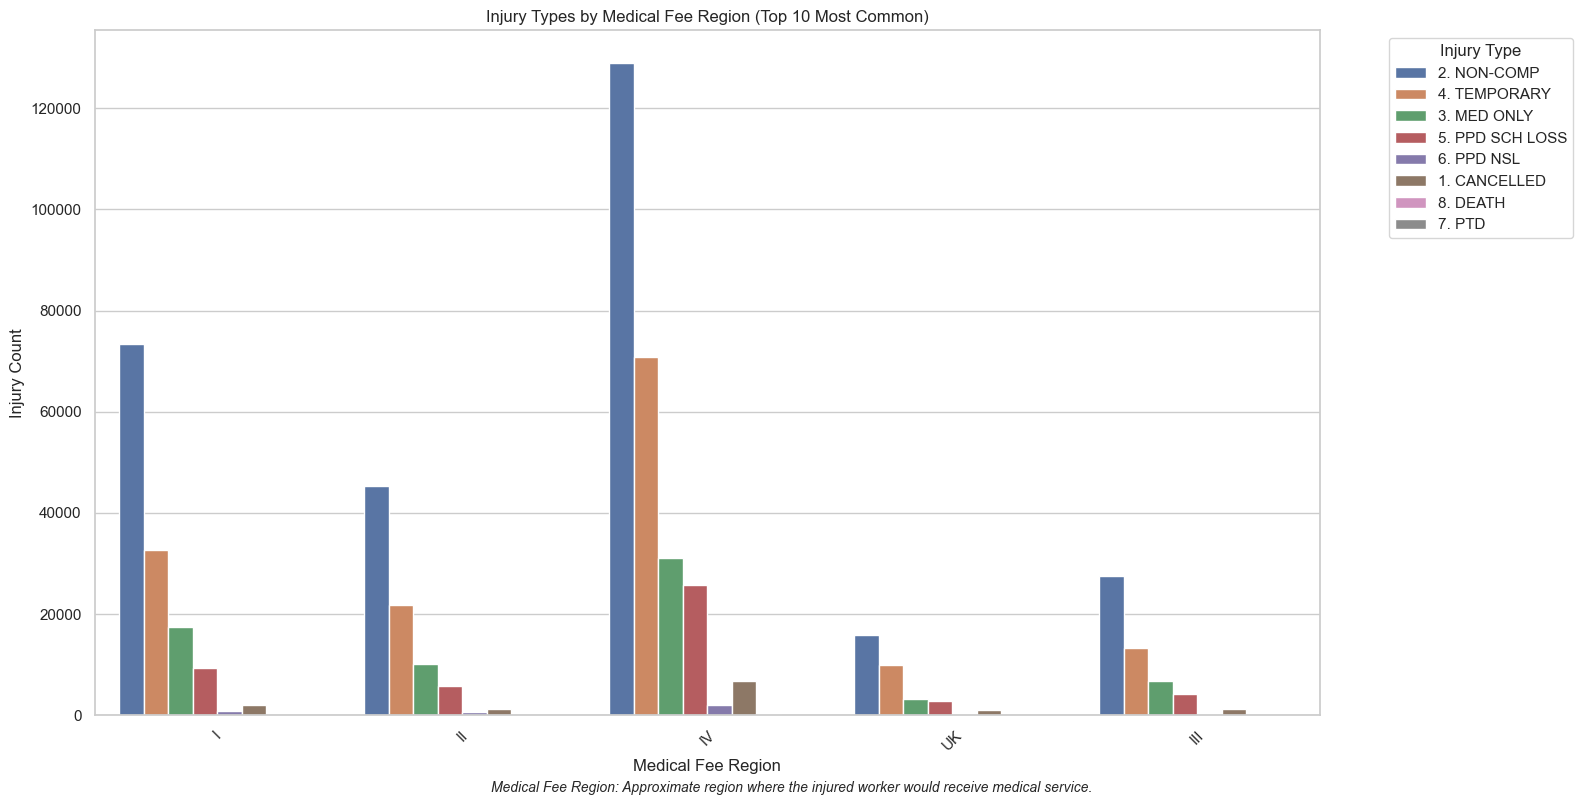

In [16]:
# Select the top 10 most common injury types
top_10_injury_types = df_train['Claim Injury Type'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 most common injury types
df_filtered = df_train[df_train['Claim Injury Type'].isin(top_10_injury_types)]

# Set the figure size
plt.figure(figsize=(16, 8))

# Create the grouped bar plot
sns.countplot(data=df_filtered, x='Medical Fee Region', hue='Claim Injury Type')
plt.xlabel('Medical Fee Region')
plt.ylabel('Injury Count')
plt.title('Injury Types by Medical Fee Region (Top 10 Most Common)')
plt.legend(title='Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a description for the Medical Fee Region
plt.figtext(0.5, 0.0, "Medical Fee Region: Approximate region where the injured worker would receive medical service.", ha="center", fontsize=10, style="italic")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The most common claim injury types across all medical fee regions are non-comp, temporary, and med-only. Death and PTD (Permanent Total Disability) injuries are rare.
- Most claims are for non-compensable injuries (less severe) or temporary injuries, indicating that many claims involve minor or recoverable injuries. Death and PTD injuries are uncommon, showing that most claims are not fatal or permanently disabling.
- The injury distribution is consistent across all medical fee regions, suggesting there’s no direct link between injury type and medical fee region. Factors other than the region, such as injury nature, likely influence the injury types.
- Non-comp and temporary injury claims are the most frequent, likely related to minor injuries like contusions or strains. Death and PTD injuries are rare, and injury types do not seem to depend on the medical fee region.

### Exploring the Relationship Between Body Section and Medical Fee Region

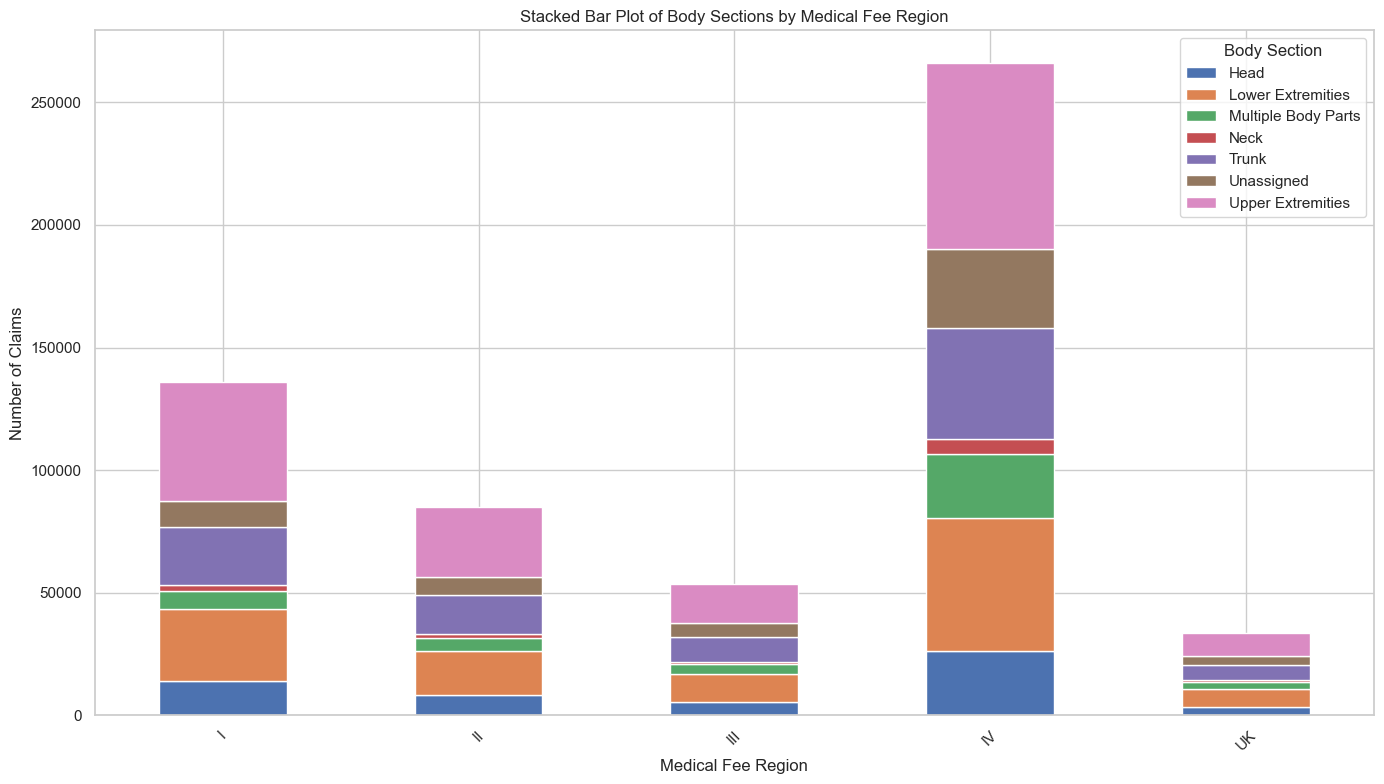

In [17]:
# Count the occurrences of each Body Section in each Medical Fee Region
grouped_data = df_train.groupby(['Medical Fee Region', 'Body Section']).size().reset_index(name='Counts')

# Pivot data for stacked bar chart
pivot_data = grouped_data.pivot_table(index='Medical Fee Region', columns='Body Section', values='Counts', aggfunc='sum', fill_value=0)

# Create the stacked bar plot
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Stacked Bar Plot of Body Sections by Medical Fee Region')
plt.xlabel('Medical Fee Region')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()

Here there is no clear pattern between the "Medical Fee Region" and the "Body Section" (affected body part). Regardless of the medical fee region, the highest number of claims is related to the upper extremities, while the lowest number of claims is related to the neck.

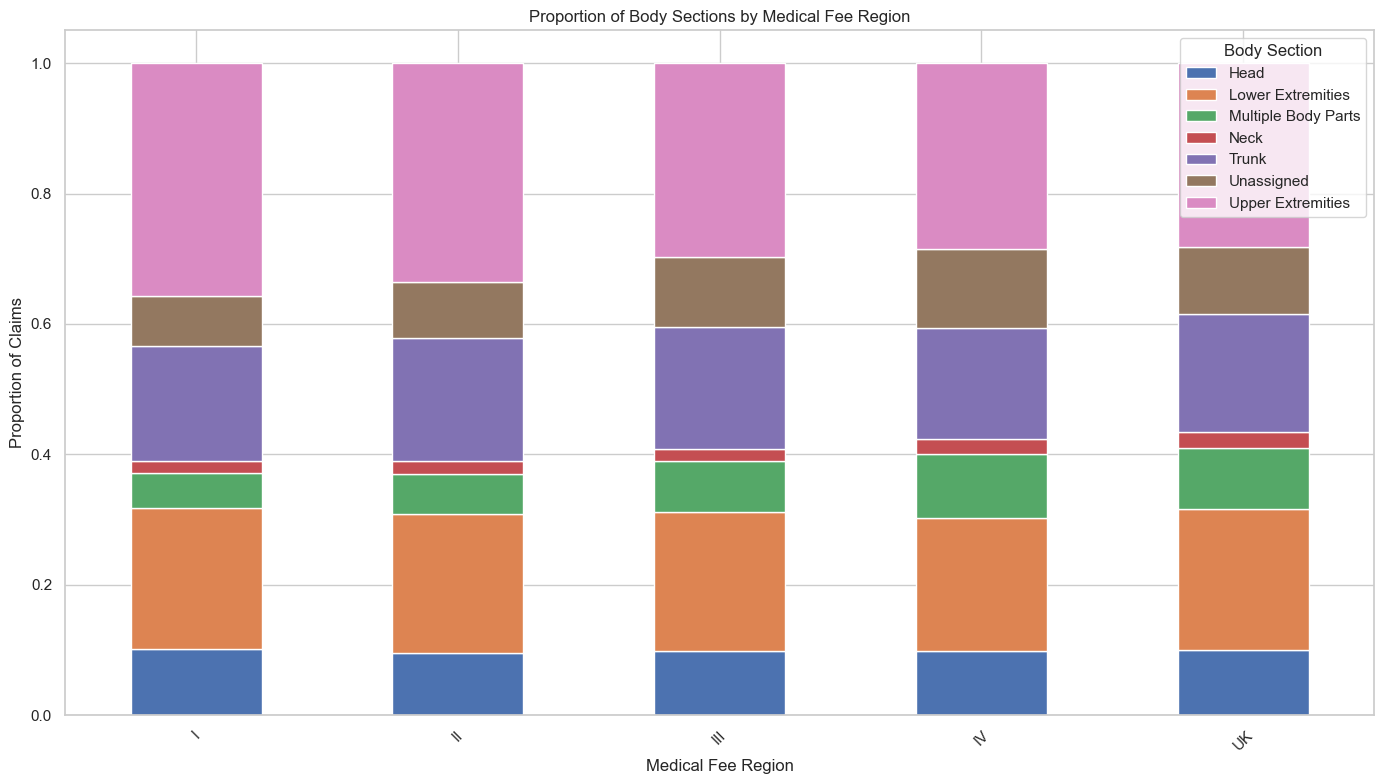

In [18]:
# Normalize data to make each bar the same height
pivot_data_normalized = pivot_data.div(pivot_data.sum(axis=1), axis=0)

# Create the stacked bar plot with normalized data
pivot_data_normalized.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Proportion of Body Sections by Medical Fee Region')
plt.xlabel('Medical Fee Region')
plt.ylabel('Proportion of Claims')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()

### Exploring the Relationship Between Injury Types and Zip Code

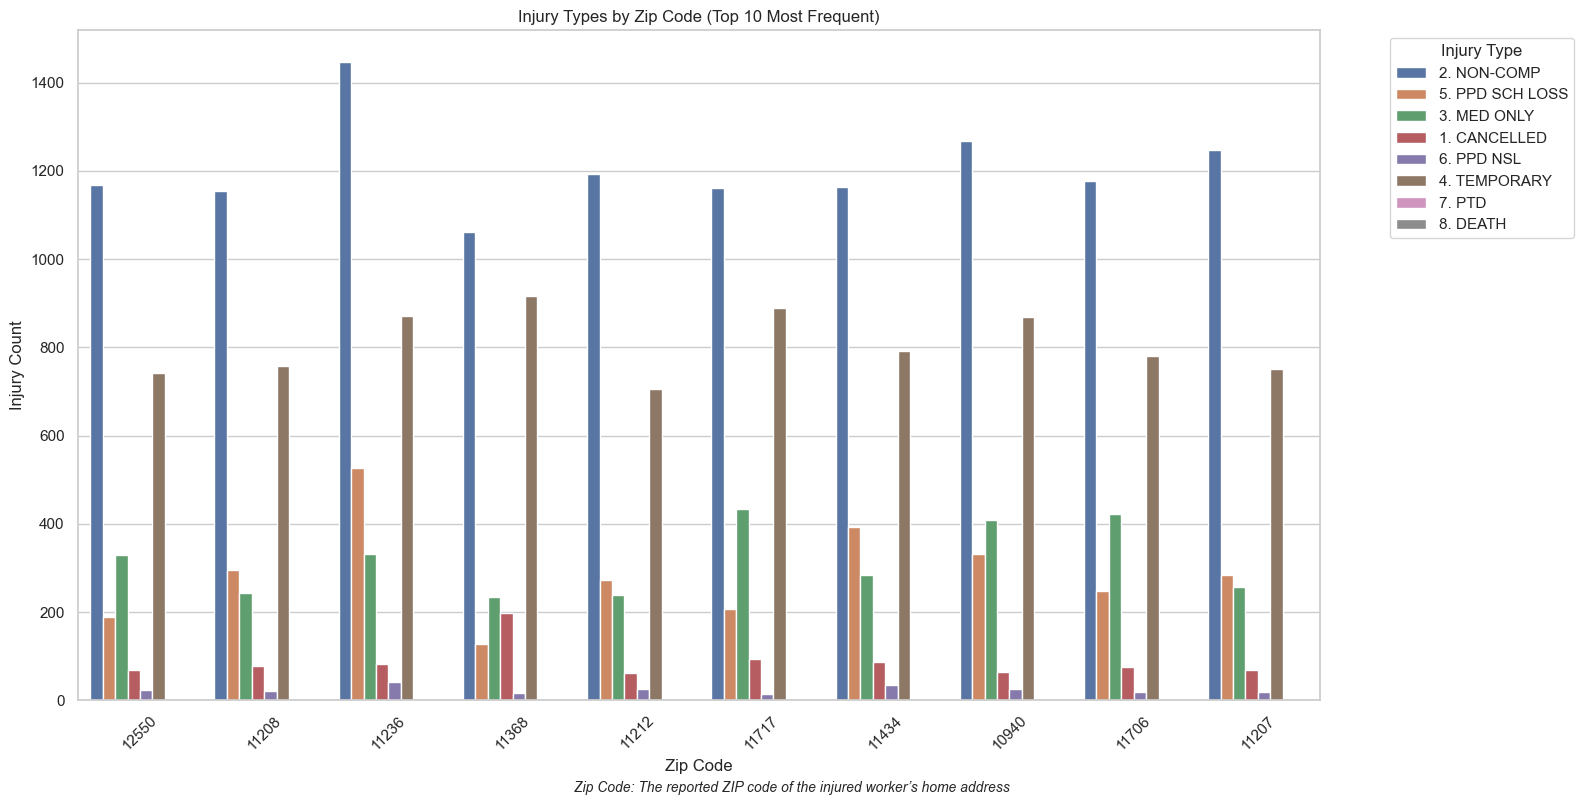

In [19]:
# Select the top 10 most frequent Zip Codes
top_zip_codes = df_filtered['Zip Code'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 most frequent Zip Codes
df_zip_filtered = df_filtered[df_filtered['Zip Code'].isin(top_zip_codes)]

# Set the figure size
plt.figure(figsize=(16, 8))

# Create the grouped bar plot
sns.countplot(data=df_zip_filtered, x='Zip Code', hue='Claim Injury Type')
plt.xlabel('Zip Code')
plt.ylabel('Injury Count')
plt.title('Injury Types by Zip Code (Top 10 Most Frequent)')
plt.legend(title='Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a description for Zip Code
plt.figtext(0.5, 0.00, "Zip Code: The reported ZIP code of the injured worker’s home address", ha="center", fontsize=10, style="italic")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Zip Code 11236 has the highest frequency of non-comp, temporary, and PPD scheduled loss injuries. This is likely due to the larger population in this area.
- Non-comp injuries are the most frequent across all zip codes, but Zip Code 11236 stands out for its higher number of temporary and PPD injuries.
- No Direct Link to Zip Code: Despite Zip Code 11236 having more injury records, the distribution of injury types across other zip codes follows a similar pattern, indicating that injury types are influenced by factors like work nature or general health, not geographical location

### Exploring the Relationship Between Injury Types Distribution and Accident Year

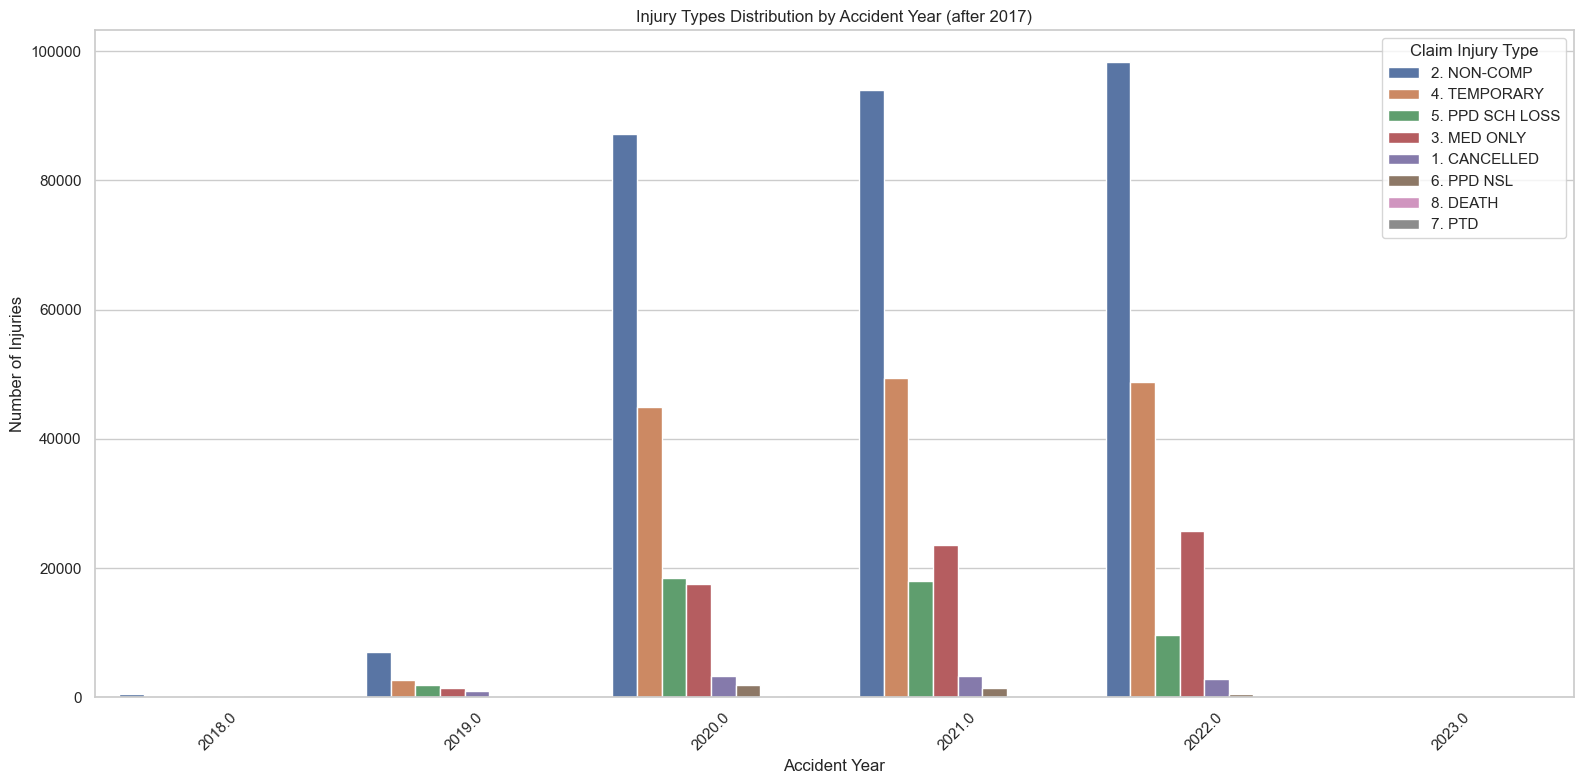

In [20]:
# Filter only the records with accident year after 2017
df_filtered = df_train[df_train['Accident Year'] > 2017]

# Bar plot for injury types by accident year (after 2017)
plt.figure(figsize=(16, 8))
sns.countplot(data=df_filtered, x='Accident Year', hue='Claim Injury Type')
plt.title('Injury Types Distribution by Accident Year (after 2017)')
plt.xlabel('Accident Year')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Data from 2017 onwards was shown, focusing on 2019-2022, which had the highest number of records.
- Non-comp injuries increased in 2019-2021, indicating more claims for less severe injuries that don't require long-term compensation.
- Temporary injuries rose sharply in 2019-2020, likely due to COVID-19 disruptions, but decreased in 2021-2022 as workplaces adapted to new safety measures.
- Med-only injuries steadily increased, suggesting more claims requiring only medical treatment.
- PPD scheduled loss injuries decreased over the years, possibly reflecting fewer serious permanent injuries, indicating improved workplace safety.
- Canceled injuries remained stable, showing no significant change in claims being dismissed or withdrawn.

### Exploring the Relationship Between COVID-19 and Injury Type

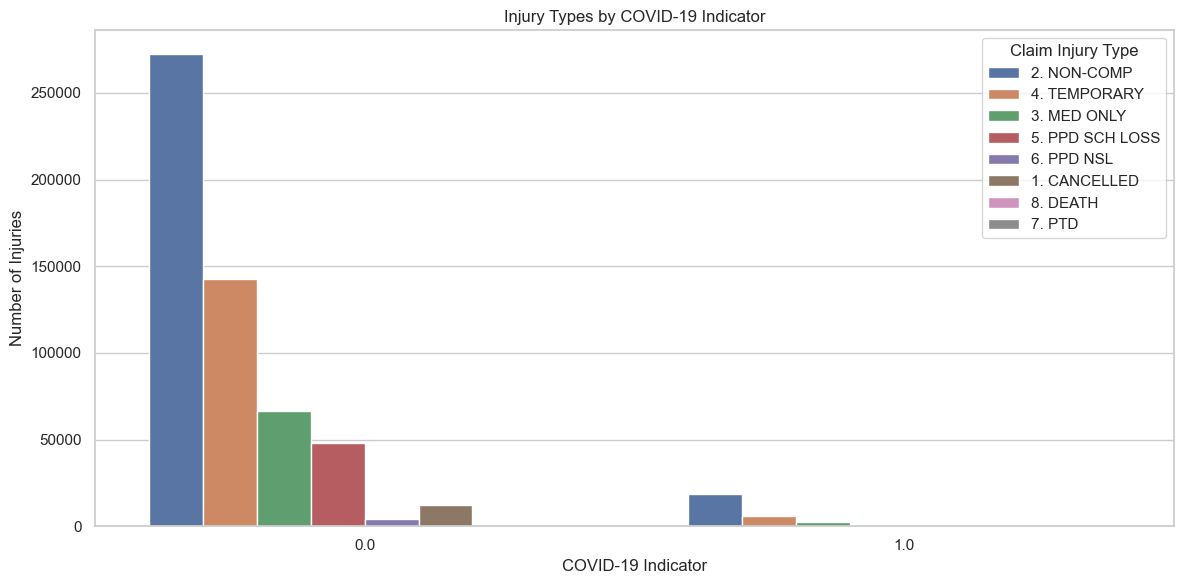

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, x='COVID-19 Indicator', hue='Claim Injury Type')
plt.title('Injury Types by COVID-19 Indicator')
plt.xlabel('COVID-19 Indicator')
plt.ylabel('Number of Injuries')
plt.tight_layout()
plt.show()

- Non-comp claims related to COVID-19 suggest many workers experienced mild symptoms or temporary issues that didn’t require long-term compensation.
- Temporary injury claims indicate the pandemic caused short-term, recoverable injuries, likely due to changes in the work environment or COVID-related disruptions.
- Med Only claims show some workers sought treatment for COVID-related health issues but didn’t need long-term care or disability benefits.
- COVID-19 claims do not strongly correlate with severe injuries like Permanent Total Disability (PTD) or Death, highlighting that most claims were for temporary or non-compensable conditions.